## 机器学习第一周
### 1.数据处理

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/82213/Desktop/uniqueAI/泰坦尼克号数据.csv")     #加载数据
#查看数据
print(data.describe())
data.info()
data.head()

       PassengerId    Survived      Pclass         Age       SibSp   
count   891.000000  891.000000  891.000000  714.000000  891.000000  \
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### （1)缺失值处理
采取方法有：knn填补，众数，补零

In [5]:
data.isnull().sum()  ##查看缺失情况

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#cabin数据缺失过多,用unknown补充
data['Cabin']=data['Cabin'].fillna('Unknown')

In [7]:
#Embarked缺失值处理
data['Embarked'].value_counts()  ##统计
#采用众数填补Embarked数据
data['Embarked']=data['Embarked'].fillna('S')

In [8]:
data.isnull().sum()  ##查看缺失情况

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

#### （2）标准化、归一化数值型特征
（Survived,Age,Pclass,Sibsp,Parch,Fare)

In [9]:
#数据标准化
def standardize(data):   #对单一特征进行标准化
    mean=np.mean(data,axis=0)    #均值
    std=np.std(data,axis=0)   #标准差
    standardized_data=(data-mean)/std
    return standardized_data

#数据归一化
def normalize(data):
    min_val=np.min(data,axis=0)
    max_val=np.max(data,axis=0)
    normalized_data=(data-min_val)/(max_val-min_val)
    return normalized_data

need_data=['Survived','Pclass','SibSp','Parch','Fare']   #Age还未填充

In [10]:
for feature in need_data:
    DATA=data[feature].values
    normalized_data=normalize(DATA) #归一化
    final_data=standardize(normalized_data) #标准化
    data[feature]=final_data
    print(np.isclose(np.mean(final_data,axis=0),0))

True
True
True
True
True


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,8.910000e+02,8.910000e+02,714.000000,8.910000e+02,8.910000e+02,8.910000e+02
mean,446.000000,3.987333e-17,-8.772133e-17,29.699118,4.386066e-17,-6.977833e-18,1.993666e-18
std,257.353842,1.000562e+00,1.000562e+00,14.526497,1.000562e+00,1.000562e+00,1.000562e+00
min,1.000000,-7.892723e-01,-1.566107e+00,0.420000,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,223.500000,-7.892723e-01,-3.693648e-01,20.125000,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,446.000000,-7.892723e-01,8.273772e-01,28.000000,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,668.500000,1.266990e+00,8.273772e-01,38.000000,4.327934e-01,-4.736736e-01,-2.424635e-02
max,891.000000,1.266990e+00,8.273772e-01,80.000000,6.784163e+00,6.974147e+00,9.667167e+00


#### (3)对于离散型变量的OneHotEncoder
(Name,Ticket,Sex,Cabin,Embarked)

In [12]:
def one_hot_encoder(data):
    unique_values=np.unique(data) #去除重复元素并进行排序
    encoded_data=np.zeros((len(data),len(unique_values))) #创建二维数组
    for i in range(len(data)):
        value=data[i]
        index=np.where(unique_values==value)[0][0]  #获取uniquevalues中与data[i]相等的元素的索引
        encoded_data[i,index]=1  #进行独热编码
    return encoded_data

In [13]:
features=['Name','Sex','Ticket','Cabin','Embarked']
for x in features:
    DATA=data[x].values
    encoded_data=one_hot_encoder(DATA)
    data[x]=encoded_data

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,0.0,0.0,22.0,0.432793,-0.473674,0.0,-0.502445,0.0,0.0
1,2,1.266990,-1.566107,0.0,1.0,38.0,0.432793,-0.473674,0.0,0.786845,0.0,1.0
2,3,1.266990,0.827377,0.0,1.0,26.0,-0.474545,-0.473674,0.0,-0.488854,0.0,0.0
3,4,1.266990,-1.566107,0.0,1.0,35.0,0.432793,-0.473674,0.0,0.420730,0.0,0.0
4,5,-0.789272,0.827377,0.0,0.0,35.0,-0.474545,-0.473674,0.0,-0.486337,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.789272,-0.369365,0.0,0.0,27.0,-0.474545,-0.473674,0.0,-0.386671,0.0,0.0
887,888,1.266990,-1.566107,0.0,1.0,19.0,-0.474545,-0.473674,0.0,-0.044381,0.0,0.0
888,889,-0.789272,0.827377,0.0,1.0,NaN,0.432793,2.008933,0.0,-0.176263,0.0,0.0
889,890,1.266990,-1.566107,0.0,0.0,26.0,-0.474545,-0.473674,0.0,-0.044381,0.0,1.0


#### 对age进行缺失值处理

In [15]:
#age缺失值处理
#采用KNN填补
def EulcDist(x0,x1):
    return np.sqrt(np.sum((x1 - x0) ** 2))    #计算欧氏距离
    
def knn_impute(df,target_feature,k):
    #X是样本特征，y是目标标记，k是最近邻居数量
    X=df.drop(columns=[target_feature]).values
    y=df[target_feature].values
    n_samples,n_features=X.shape    #n_samples是样本数量，n_features是特征数量
    #创建两个布尔数组分别表示缺失值和非缺失值的索引，用于获取缺失行和未缺失行
    missing_indices=np.isnan(y)
    non_missing_indices=~missing_indices 
    
    for i in range(n_samples):
        if np.isnan(y[i]):    #判断数据是否缺失
            X_missing = X[i]   #取当前缺失行的其他特征值
            X_non_missing = X[non_missing_indices]  #得到未缺失行的其他特征
            distances=[]   #创建距离列表，每个元素为（距离的值，邻居索引）
            
            for j in range(len(X_non_missing)):   #迭代未缺失行取均值
                if i==j:
                    continue
                dist=EulcDist(X_non_missing[j],X_missing)
                distances.append((dist,j))
            
            distances.sort()
            knn_indices= [idx for (_,idx) in distances[:k]]     #从距离列表 distances 中选择距离当前样本最近的 k 个邻居的索引
            y[i]=np.mean(y[non_missing_indices][knn_indices])         #先获取未缺失列表，再获取最近邻居值，最后求均值用于填充
    df[target_feature]=y
    return df

In [16]:
data=knn_impute(data,'Age',3)

In [17]:
#对age进行标准化、归一化
DATA=data['Age'].values
normalized_data=normalize(DATA) #归一化
final_data=standardize(normalized_data) #标准化
data['Age']=final_data

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,0.0,0.0,-0.572226,0.432793,-0.473674,0.0,-0.502445,0.0,0.0
1,2,1.266990,-1.566107,0.0,1.0,0.602339,0.432793,-0.473674,0.0,0.786845,0.0,1.0
2,3,1.266990,0.827377,0.0,1.0,-0.278585,-0.474545,-0.473674,0.0,-0.488854,0.0,0.0
3,4,1.266990,-1.566107,0.0,1.0,0.382108,0.432793,-0.473674,0.0,0.420730,0.0,0.0
4,5,-0.789272,0.827377,0.0,0.0,0.382108,-0.474545,-0.473674,0.0,-0.486337,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.789272,-0.369365,0.0,0.0,-0.205175,-0.474545,-0.473674,0.0,-0.386671,0.0,0.0
887,888,1.266990,-1.566107,0.0,1.0,-0.792457,-0.474545,-0.473674,0.0,-0.044381,0.0,0.0
888,889,-0.789272,0.827377,0.0,1.0,-0.278585,0.432793,2.008933,0.0,-0.176263,0.0,0.0
889,890,1.266990,-1.566107,0.0,0.0,-0.278585,-0.474545,-0.473674,0.0,-0.044381,0.0,1.0


### 2.逻辑回归
实现逻辑回归
防止过拟合的算法
尝试多种优化算法

In [19]:
def sigmoid(z):    #实现激活函数sigmoid对数几率函数
    return np.exp(z)/(1+np.exp(z))   #原本是1/(1+exp(-z))但会出现溢出，这里采取数值稳定的等价形式

def initialize_weights(num_features):    #初始化权重参数
    return np.zeros(num_features)

def cost_function(X,y,weights,regularization_param):   #代价函数
    #包含正则化防止过拟合
    #X为特征矩阵，y为标签向量，regularization_param为正则化参数，用于控制正则化强度
    n_samples=len(y)  #样本数量
    h=sigmoid(np.dot(X,weights))  #矩阵点乘得到线性模型,即P(X)
    eps=1e-10
    h=np.clip(h,eps,1-eps)  #通过clip函数将h进行微小偏移，是其不会等于0或1，防止除零错误
    cost=-(1/n_samples)*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))
    regularization_term=(regularization_param / (2*n_samples)) * np.sum(weights[1:]**2)#正则化项，惩罚权重趋势
    cost+=regularization_term
    return cost

def gradient_descent(X, y, weights, learning_rate, regularization_param, num_iterations):  #随机梯度下降优化算法
    n_samples=len(y)
    cost_history=[]   #存储每次迭代的代价函数值,用以观察是否在收敛
    for _ in range(num_iterations):
        h=sigmoid(np.dot(X,weights)) #求以当前权重所求得的输出值
        error=h-y   #模型输出与实际的误差
        gradient=(1/n_samples)*(np.dot(X.T,error)+regularization_param*weights)
        gradient[0]-=regularization_param*weights[0]  #该项作为bias偏置项，不做正则化处理
        weights-=learning_rate*gradient #更新权重
        cost=cost_function(X,y,weights,regularization_param)
        cost_history.append(cost)
    return weights,cost_history

def logistic_regression1(X, y, learning_rate=0.01, regularization_param=0.1, num_iterations=1000): #逻辑回归主体，拟合模型（梯度下降法）
    n_samples,n_features=X.shape
    weights=initialize_weights(n_features)
    weights,cost_history=gradient_descent(X,y,weights,learning_rate,regularization_param,num_iterations)
    return weights,cost_history


In [20]:
#回归得到模型
#不能选取过多特征，否则会导致模型过拟合，代价函数呈增长趋势
X=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y=data['Survived'].values
weights,cost_history=logistic_regression1(X,y)

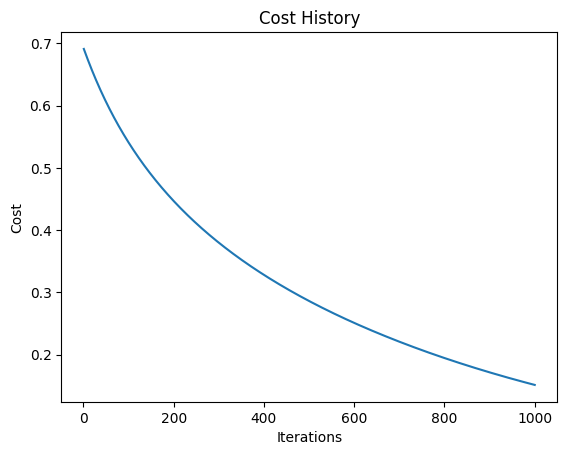

In [21]:
import matplotlib.pyplot as plt
def plot_cost_history(cost_history):            #画出代价函数图像，观察是否收敛
    iterations = range(1,len(cost_history) + 1)
    plt.plot(iterations, cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.show()

plot_cost_history(cost_history)

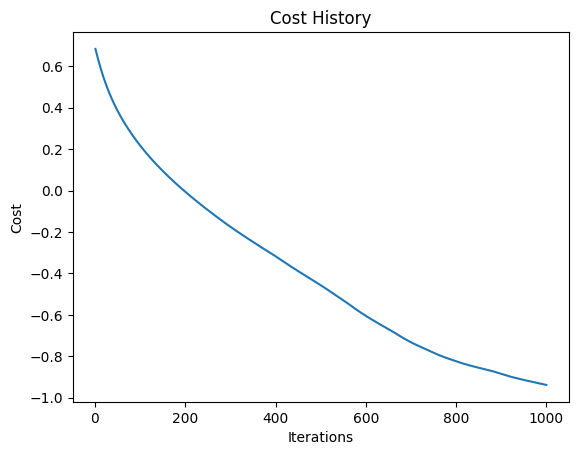

In [22]:
#其他优化算法
#adam算法
def adam_optimizer(X,y,weights,learning_rate,regularization_param,num_iterations,beta1=0.9,beta2=0.999,epsilon=1e-8):
    #beta1是一阶矩估计的指数衰减率，beta2是二阶矩估计的指数衰减率，epsilon为极小常数用于数值稳定性
    n_samples=len(y)
    cost_history=[]
    m=np.zeros_like(weights)  #一阶矩估计--均值
    v=np.zeros_like(weights)  #二阶矩估计--方差
    t=0 #迭代次数
    for _ in range(num_iterations):
        t+=1
        h=sigmoid(np.dot(X,weights))
        error=h-y
        gradient=(1/n_samples)*(np.dot(X.T,error)+regularization_param*weights)
        gradient[0]-=regularization_param*weights[0]
        
        m=beta1*m+(1-beta1)*gradient  #更新一阶矩估计
        v=beta2*v+(1-beta2)*(gradient**2)  #更新二阶矩估计
        m_hat=m/(1-beta1**t)  #修正一阶矩估计
        v_hat=v/(1-beta2**t)  #修正二阶矩估计
        weights-=learning_rate*(m_hat/(np.sqrt(v_hat)+epsilon))  #更新权重
        cost=cost_function(X,y,weights,regularization_param)
        cost_history.append(cost)
    return weights,cost_history

def logistic_regression2(X, y, learning_rate=0.01, regularization_param=0.1, num_iterations=1000):
    n_samples,n_features=X.shape
    weights=initialize_weights(n_features)
    weights,cost_history=adam_optimizer(X, y, weights, learning_rate, regularization_param, num_iterations)
    return weights,cost_history

X=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y=data['Survived'].values
weights,cost_history=logistic_regression2(X,y)
plot_cost_history(cost_history)

### 3.机器学习
#### SVM

In [23]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,0.0,0.0,-0.572226,0.432793,-0.473674,0.0,-0.502445,0.0,0.0
1,2,1.266990,-1.566107,0.0,1.0,0.602339,0.432793,-0.473674,0.0,0.786845,0.0,1.0
2,3,1.266990,0.827377,0.0,1.0,-0.278585,-0.474545,-0.473674,0.0,-0.488854,0.0,0.0
3,4,1.266990,-1.566107,0.0,1.0,0.382108,0.432793,-0.473674,0.0,0.420730,0.0,0.0
4,5,-0.789272,0.827377,0.0,0.0,0.382108,-0.474545,-0.473674,0.0,-0.486337,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.789272,-0.369365,0.0,0.0,-0.205175,-0.474545,-0.473674,0.0,-0.386671,0.0,0.0
887,888,1.266990,-1.566107,0.0,1.0,-0.792457,-0.474545,-0.473674,0.0,-0.044381,0.0,0.0
888,889,-0.789272,0.827377,0.0,1.0,-0.278585,0.432793,2.008933,0.0,-0.176263,0.0,0.0
889,890,1.266990,-1.566107,0.0,0.0,-0.278585,-0.474545,-0.473674,0.0,-0.044381,0.0,1.0


In [24]:
def smo(X,y,C,kernel,tol=0.001,max_iter=100):                   #smo主体函数，每次选择两个变量进行优化
    #C为正则化参数，用于平衡间隔和误分类点的权重
    #kernel为核函数类型，可以是 'linear'（线性核）、'poly'（多项式核）或 'rbf'（高斯核）、’sigmoid‘（sigmoid核）
    #tol为迭代停止的容差。当所有样本的拉格朗日乘子都满足 KKT 条件时，算法将停止迭代。
    #smo函数使用序列最小优化（SMO）算法来求解支持向量机（SVM）。它通过迭代选择两个变量并优化它们的拉格朗日乘子，以逐步更新模型的参数。
    
    n_samples,n_features=X.shape
    alpha=np.zeros(n_samples) #alpha表示拉格朗日乘子
    b=0 #偏置项
    gram_matrix = compute_gram_matrix(X, kernel)  #gram矩阵用于存储样本间的核函数值,compute_gram_matrix函数用于计算核函数值
    iter_count=0     #用于记录连续没有发生变化的迭代次数
    
    while iter_count<max_iter:
        alpha_changed=0  #用于记录每次更新的拉格朗日乘子的数量,如果为0，则达到局部最小值
        for i in range(n_samples):
            error_i = calculate_error(i, X, y, alpha, b, gram_matrix) #计算样本i的预测误差
            hinge_loss_i=calculate_hinge_loss(i,X,y,alpha,b,gram_matrix)
            if (y[i]*error_i<-tol and alpha[i]<C)or (y[i]*error_i>tol and alpha[i]>0):        #样本i被错误分类
                j = select_second_sample(i,error_i,X,y,gram_matrix,alpha,C)
                #找到与样本 i 组成优化对的样本，并在优化过程中对这对样本的拉格朗日乘子进行更新
                error_j = calculate_error(j, X, y, alpha, b, gram_matrix)
                hinge_loss_j=calculate_hinge_loss(j,X,y,alpha,b,gram_matrix)
                alpha_old_i=alpha[i]
                alpha_old_j=alpha[j]
                #计算拉格朗日乘子的取值范围
                if y[i]!=y[j]:
                    L=max(0,alpha[j]-alpha[i])       #下界
                    H=min(C,C+alpha[j]-alpha[i])     #上界
                else:
                    L=max(0,alpha[i]+alpha[j]-C)
                    H=min(C,alpha[i]+alpha[j])
                if L==H:
                    continue    #拉格朗日值已经确定唯一
                
                eta = 2 * gram_matrix[i, j] - gram_matrix[i, i] - gram_matrix[j, j]   #用于计算更新拉格朗日值的步长
                if eta>=0:
                    continue    #步长小于0，才会优化使目标函数下降.步长大于0，说明不适合优化
                    
                alpha[j] = alpha[j] - (y[j] * (error_i - error_j)) / eta    #更新alpha[j]
                alpha[j] = clip_alpha(alpha[j], L, H)          #进行裁剪保证取值范围正确
                
                if abs(alpha[j]-alpha_old_j)<1e-5:
                    continue      #alpha[j]已经足够优化
                
                alpha[i]+=y[i]*y[j]*(alpha_old_j-alpha[j])   #更新alpha[i]
                #更新偏置项b
                b1 = b-error_i - y[i] * (alpha[i] - alpha_old_i) * gram_matrix[i, i] - y[j] * (alpha[j] - alpha_old_j) *gram_matrix[i, j]
                b2 = b-error_j - y[i] * (alpha[i] - alpha_old_i) * gram_matrix[i, j] - y[j] * (alpha[j] - alpha_old_j) *gram_matrix[j, j]
                if 0<alpha[i]<C:         #表示样本i对优化起了贡献并且不处在边界上
                    b=b1
                elif 0<alpha[j]<C:       #表示样本j对优化起了贡献并且不处在边界上
                    b=b2
                else:
                    b=(b1+b2)/2
                    
                alpha_changed+=1     #运行到最后了则表示拉格朗日值更新+1
            if alpha_changed==0:
                iter_count+=1
            else:
                iter_count=0
                
        support_vectors_indices=np.where(alpha>0)[0]   #拉格朗日乘子大于0的为支撑向量，获取支撑向量的索引
        support_vectors = X[support_vectors_indices]   #通过索引索取支撑向量的特征向量
        support_vector_labels = y[support_vectors_indices]  #通过索引获取支撑向量的标签
        support_vector_alphas = alpha[support_vectors_indices]  #通过索引获取支撑向量的拉格朗日乘子
        return support_vectors,support_vector_labels,support_vector_alphas,b


In [25]:
#上面所用到的辅助函数
def compute_gram_matrix(X,kernel):    #用于计算样本间核矩阵（gram矩阵），用于描述样本间的相似性
    n_samples=X.shape[0]
    gram_matrix=np.zeros((n_samples,n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            gram_matrix[i,j]=kernel_function(X[i],X[j],kernel)      #计算核函数值
    return gram_matrix

def kernel_function(x1,x2,kernel):    #用于计算核函数值
    #x1,x2为特征向量
    if kernel == 'linear':    #线性核函数
        return np.dot(x1,x2)
    elif kernel == 'poly':     #多项式核函数
        c=1.0         #偏移数
        d=3.0         #维数
        return (np.dot(x1,x2)+c)**d
    elif kernel == 'rbf':      #高斯核函数
        sigma=1.0
        return np.exp(-np.linalg.norm(x2-x1)**2/(2*sigma**2))      #np.linalg.norm计算向量间的欧式距离
    elif kernel == 'sigmoid':         #sigmoid核函数
        a=1.0           #控制相似性衰减速度的参数
        b=0.0           #控制核函数值在[-1,1]之间偏移
        return np.tanh(a*np.dot(x1,x2)+b)
    
def calculate_error(index,X,y,alpha,b,gram_matrix):             #计算预测错误
    prediction=np.sign(np.sum(alpha*y*gram_matrix[index])+b)
    return prediction-y[index]      #值为正，则表示预测错误，值为负则预测正确

def calculate_hinge_loss(index, X, y, alpha, b, gram_matrix):         #计算合页损失函数
    prediction = np.sum(alpha * y * gram_matrix[index]) + b
    loss = max(0, 1 - y[index] * prediction)
    return loss

def clip_alpha(alpha,L,H):           #对alpha进行取值范围限制
    if alpha<L:
        return L
    elif alpha>H:
        return H
    else:
        return alpha

def select_second_sample(i1,error1,X,y,kernel_matrix,alpha,C):
    #选择一个与第一个样本 i 组成优化对的样本。通过优化这对样本的拉格朗日乘子，可以逐步更新模型的参数，以达到最优解
    non_bound_indices=np.where((alpha>0)&(alpha<C))[0]
    max_step=0
    i2=None
    error2=0
    if len(non_bound_indices)>1:
        for i in non_bound_indices:
            if i==i1:
                continue
                
            error=predict(i,X,y,kernel_matrix,alpha)-y[i]
            step=abs(error1-error)
            if step>max_step:
                max_step=step
                i2=i
                error2=error
    if i2 is not None:
        return i2
    
    #在非边界索引中找不到合适的，则随机选择样本2
    random_indices=np.arange(X.shape[0])
    np.random.shuffle(random_indices)
    for i in random_indices:
        if i==i1:
            continue
        error = predict(i,y,kernel_matrix,alpha)-y[i]
        step=abs(error1-error)
        if step>max_step:
            max_step=step
            i2=i
            error2=error
    return i2

def predict(x,y,kernel_matrix,alpha):          #返回分类预测结果
    return np.sum(alpha*y*kernel_matrix[x])

In [26]:
#SVM可视化分析函数
def decision_function(X, y, support_vectors, support_vector_labels, support_vector_alphas, b, kernel):
    #计算输入样本的决策值
    n_samples=X.shape[0]
    decision_values=np.zeros(n_samples)          #存储每个样本的决策值
    for i in range(n_samples):
        kernel_values = np.zeros(len(support_vectors))
        for j, sv in enumerate(support_vectors):
            kernel_values[j] = kernel_function(sv, X[i], kernel)  # 计算支持向量与样本之间的核函数值
        decision_values[i]=np.sum(support_vector_alphas*support_vector_labels*kernel_values)
    return decision_values+b

def pca(X,n_components):               #降维以能够在二维平面可视化
    # 计算数据的均值向量
    mean_vec = np.mean(X, axis=0)
    # 将数据中心化
    centered_X = X - mean_vec
    # 计算协方差矩阵
    covariance_matrix = np.cov(centered_X, rowvar=False)
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # 选择前n_components个最大的特征向量
    top_n_eigenvectors = eigenvectors[:, -n_components:]
    # 对数据进行降维
    reduced_X = np.dot(centered_X, top_n_eigenvectors)
    return reduced_X

def decision_boundary(X,y,support_vectors,support_vector_alphas,support_vector_labels,b,kernel):            #计算决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #创建网格点
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    #展平网格点并进行预测
    grid_points=np.c_[xx.ravel(),yy.ravel()]
    decision_values = decision_function(grid_points, y, support_vectors, support_vector_labels, support_vector_alphas, b, kernel)
    decision_values=decision_values.reshape(xx.shape)      #调整为与网格点的形状相同
    return xx,yy,decision_values

def plot_decision_boundary(X,y,xx,yy,decision_values):        #绘制决策边界
    plt.contourf(xx, yy, decision_values, cmap=plt.cm.Paired, alpha=0.8)     #绘制等高线图展示决策边界
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)             #绘制数据点的散点图
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary')
    plt.show()
    

In [27]:
#SVM求解
X=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y=data['Survived'].values
support_vectors, support_vector_labels, support_vector_alphas, b = smo(X, y, C=1.0, kernel='sigmoid')

In [28]:
X_pca=pca(X,n_components=2)
#计算决策边界
xx, yy, decision_values = decision_boundary(X_pca, y, support_vectors, support_vector_labels, support_vector_alphas, b, kernel='linear')
# 绘制决策边界和数据点
plot_decision_boundary(X_pca, y, xx, yy, decision_values)

ValueError: shapes (7,) and (2,) not aligned: 7 (dim 0) != 2 (dim 0)

#### 验证

In [40]:
from sklearn.model_selection import train_test_split

# 切割数据集，将 80% 的数据作为训练集，20% 的数据作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train 和 y_train 是训练集的特征矩阵和标签向量
# X_test 和 y_test 是测试集的特征矩阵和标签向量

support_vectors, support_vector_labels, support_vector_alphas, b = smo(X, y, C=1.0, kernel='sigmoid')

def predict(X, support_vectors, support_vector_labels, support_vector_alphas, b, kernel):
    num_samples = X.shape[0]
    predictions = np.zeros(num_samples)
    for i in range(num_samples):
        kernel_values = kernel_function(support_vectors, X[i], kernel)
        prediction = np.sum(support_vector_alphas * support_vector_labels * kernel_values) + b
        predictions[i] = np.sign(prediction)
    return predictions

# 使用测试集验证正确率
y_pred = predict(X_test, support_vectors, support_vector_labels, support_vector_alphas, b, kernel='linear')
accuracy = np.mean(y_pred == y_test) * 100
print(f"正确率: {accuracy:.2f}%")

TypeError: predict() missing 1 required positional argument: 'kernel'